This cell includes some of the necessary constants and libraries to start.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
outdir = "homework-2-1"
os.makedirs(outdir, exist_ok=True)
epsilon = 0.01
sigma = 3.4

This cell includes the rest of the necessary imports for the main notebook.

In [2]:
%pip install scipy
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import sys, os
import contextlib
with open(os.devnull, 'w') as f, contextlib.redirect_stdout(f):
    from Prob2 import compute_bond_length, compute_bond_angle




Note: you may need to restart the kernel to use updated packages.


This cell uses the optmization .py file for the dimer to output the results of the calculation along with the XYZ setup of the Ar-Ar dimer. The rest of the cell plots the potential.

=== Ar2 Optimization (Lennard-Jones) ===
Numerical r_eq = 3.816383 A
Analytic r_eq = 3.816371 A
V(r_eq) = -0.010000 eV
epsilon = 0.01 eV
Wrote homework-2-1/ar2_equilibrium.xyz
XYZ at: homework-2-1/ar2_equilibrium.xyz  | exists: True
---XYZ---
2
Argon dimer optimized with Lennard-Jones potential
Ar 0.000000 0.00000 0.00000
Ar 3.816383 0.00000 0.00000

Wrote homework-2-1/ar2_lennard_jones.png


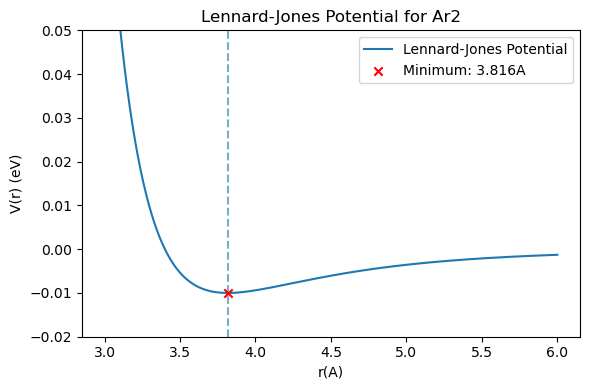

In [4]:
from optimize_argon_dimer import main, lennard_jones
r_eq, Vmin, outdir = main()
xyz_path = os.path.join(outdir, "ar2_equilibrium.xyz")
print("XYZ at:", xyz_path, " | exists:", os.path.exists(xyz_path))
with open(xyz_path, "r") as f:
    print("---XYZ---")
    print(f.read())
r=np.linspace(3, 6, 500)
V= lennard_jones(r, epsilon=epsilon, sigma=sigma)
plt.figure(figsize=(6,4))
plt.plot(r, V, label="Lennard-Jones Potential")
plt.scatter(r_eq, Vmin, zorder=5, label=f"Minimum: {r_eq:.3f}A", marker="x", color="red")
plt.axvline(r_eq, ls="--", alpha=.6)
plt.xlabel("r(A)")
plt.ylabel("V(r) (eV)")
plt.title("Lennard-Jones Potential for Ar2")
plt.ylim(-.02, .05)
plt.legend()
plt.tight_layout()
fig_path= os.path.join(outdir, "ar2_lennard_jones.png")
plt.savefig(fig_path, dpi=300)
print(f"Wrote {fig_path}")


    

this cell gets the necessary outputs from the trimer .py file to calculate the angles and distances between the atoms and the XYZ output.

In [ ]:
import os
from optimize_argon_trimer import main as trimer_main
distances, angles, E_min, outdir, coords = trimer_main()
xyz3= os.path.join(outdir, "ar3_equilibrium.xyz")
with open(xyz3) as f:
    print("\n--- Ar3 XYZ ---\n" + f.read())


=== Ar3 Optimization (Lennard-Jones) ===
Numerical r_eq = 3.816371 A
Analytic r_eq = 3.816371 A
V(r_eq) = -0.030000 eV
epsilon = 0.01 eV

Computed bond lengths (A):
r12: 3.816371
r13: 3.816371
r23: 3.816371

Computed bond angles (degrees):
angle 123: 60.000000
angle 132: 60.000000
angle 231: 60.000000
Analytic bond angle: 60.000000

The triangle is nearly equilateral.
Wrote homework-2-1/ar3_equilibrium.xyz

--- Ar3 XYZ ---
3
Argon dimer optimized with Lennard-Jones potential
Ar 0.000000 0.00000 0.00000
Ar 3.816371 0.00000 0.00000
Ar 1.908185 3.30507 0.00000

